In [20]:
# load relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
# import data
events = pd.read_csv('data/premier_league_events.csv')

In [4]:
events.head()

,matchId,matchPeriod,id,eventSec,start_x,start_y,end_x,end_y,eventId,eventName,...,clearance,slidingTackle,redCard,yellowCard,secondYellowCard,accurate,inaccurate,counterAttack,dangerousBallLost,blocked
0,2499719,1H,177959171,2.758649,49,49,31,78,8,Pass,...,0,0,0,0,0,1,0,0,0,0
1,2499719,1H,177959172,4.946850,31,78,51,75,8,Pass,...,0,0,0,0,0,1,0,0,0,0
2,2499719,1H,177959173,6.542188,51,75,35,71,8,Pass,...,0,0,0,0,0,1,0,0,0,0
3,2499719,1H,177959174,8.143395,35,71,41,95,8,Pass,...,0,0,0,0,0,1,0,0,0,0
4,2499719,1H,177959175,10.302366,41,95,72,88,8,Pass,...,0,0,0,0,0,1,0,0,0,0


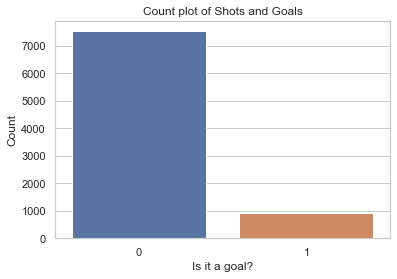

In [6]:
# take a subset for any shots on goal
shots = events[events.eventName == 'Shot']

# make a countplot of goals and misses
sns.countplot(x='goal', data=shots)
plt.title('Count plot of Shots and Goals')
plt.xlabel('Is it a goal?')
plt.ylabel('Count')
plt.show()

As you can see the data is very imbalanced, with much fewer goals than misses. To solve this problem for our preliminary model we will simply undersample the missed shots.

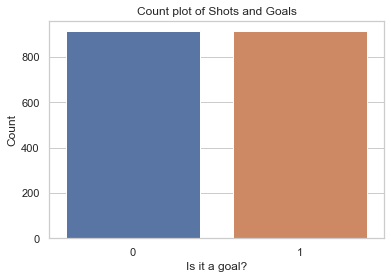

In [15]:
num_goals = len(shots[shots.goal == 1])

# filter out the goals/missed shots so we can undersample
misses = shots[shots.goal == 0]
goals = shots[shots.goal ==1]

# undersample the misses so the number matches the number of goals in the dataset
misses_sample = misses.sample(n=num_goals, random_state=42)

# remerge the datasets and sort by index
shots_resamp = goals.append(misses_sample)
shots_resamp.sort_index(inplace=True)

# plot counts to check for balance
sns.countplot(x='goal', data=shots_resamp)
plt.title('Count plot of Shots and Goals')
plt.xlabel('Is it a goal?')
plt.ylabel('Count')
plt.show()

The above count plot shows that the dataset is now balanced. However, the downside of undersampling is that we have just thrown away almost 80% of our data. This will have a negative impact on the model's predictive power and we will explore other options as we make the model more robust.

In [16]:
# split data into x and y values
X = shots_resamp[['start_y', 'start_x']]
y = shots_resamp.goal

# split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [22]:

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[116  81]
 [ 35 134]]


In [25]:
print(metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       197
           1       0.62      0.79      0.70       169

    accuracy                           0.68       366
   macro avg       0.70      0.69      0.68       366
weighted avg       0.70      0.68      0.68       366

